In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split


import seaborn as sns;

In [5]:
## Magics and commom settings
pd.set_option('display.float_format', lambda x: '%.4f' % x)
%matplotlib inline

## Reading data

In [6]:
!dir data

 O volume na unidade C não tem nome.
 O Número de Série do Volume é D8D6-4768

 Pasta de C:\Users\braian.dias\datascience\machine-learning\projects\capstone\home_credit\data

28/08/2018  15:10    <DIR>          .
28/08/2018  15:10    <DIR>          ..
13/08/2018  17:06        26.567.651 application_test.csv
13/08/2018  17:06       166.133.370 application_train.csv
13/08/2018  17:06       170.016.717 bureau.csv
13/08/2018  17:06       375.592.889 bureau_balance.csv
13/08/2018  17:06       424.582.605 credit_card_balance.csv
28/08/2018  15:10           172.475 exploratory_analysis.twb
13/08/2018  17:06            37.383 HomeCredit_columns_description.csv
13/08/2018  17:05       723.118.349 installments_payments.csv
13/08/2018  17:06       392.703.158 POS_CASH_balance.csv
13/08/2018  17:06       404.973.293 previous_application.csv
13/08/2018  17:06           536.202 sample_submission.csv
              11 arquivo(s)  2.684.434.092 bytes
               2 pasta(s)   178.130.599.936 bytes di

In [7]:
app_test = pd.read_csv("data/application_test.csv")
app_train = pd.read_csv("data/application_train.csv")
#bureau = pd.read_csv("data/bureau.csv")
#bureau_balance = pd.read_csv("data/bureau_balance.csv")
#previous_application = pd.read_csv("data/previous_application.csv")
#POS_CASH_balance = pd.read_csv("data/POS_CASH_balance.csv")
#credit_card_balance = pd.read_csv("data/credit_card_balance.csv")
#installments_payments = pd.read_csv("data/installments_payments.csv")

In [6]:
cols = ["file_name","columns","rows"]
file_stats = pd.DataFrame(columns = cols)

file_stats = pd.concat([file_stats,pd.DataFrame(np.array([["application_train.csv",app_train.shape[1],app_train.shape[0]]]),columns=cols)])
file_stats = pd.concat([file_stats,pd.DataFrame(np.array([["application_test.csv",app_test.shape[1],app_test.shape[0]]]),columns=cols)])
file_stats = pd.concat([file_stats,pd.DataFrame(np.array([["bureau.csv",bureau.shape[1],bureau.shape[0]]]),columns=cols)])
file_stats = pd.concat([file_stats,pd.DataFrame(np.array([["bureau_balance.csv",bureau_balance.shape[1],bureau_balance.shape[0]]]),columns=cols)])
file_stats = pd.concat([file_stats,pd.DataFrame(np.array([["credit_card_balance.csv",credit_card_balance.shape[1],credit_card_balance.shape[0]]]),columns=cols)])
file_stats = pd.concat([file_stats,pd.DataFrame(np.array([["installments_payments.csv",installments_payments.shape[1],installments_payments.shape[0]]]),columns=cols)])
file_stats = pd.concat([file_stats,pd.DataFrame(np.array([["POS_CASH_balance.csv",POS_CASH_balance.shape[1],POS_CASH_balance.shape[0]]]),columns=cols)])
file_stats = pd.concat([file_stats,pd.DataFrame(np.array([["previous_application.csv",previous_application.shape[1],previous_application.shape[0]]]),columns=cols)])
file_stats = file_stats.reset_index(drop=True)

In [7]:
#Set dataframes to None to free memory after we have calculated the basic statistics for all files
POS_CASH_balance = None
credit_card_balance = None
installments_payments = None
previous_application = None
bureau = None
bureau_balance = None

file_stats.to_csv("file_stats.csv",index=False)

Below is a summary of all 8 files available : 1 main file for training (with target) 1 main file for testing (without the target), and 6 other files containing additional information about each loan.

In [8]:
file_stats

,file_name,columns,rows
0,application_train.csv,122,307511
1,application_test.csv,121,48744
2,bureau.csv,17,1716428
3,bureau_balance.csv,3,27299925
4,credit_card_balance.csv,23,3840312
5,installments_payments.csv,8,13605401
6,POS_CASH_balance.csv,8,10001358
7,previous_application.csv,37,1670214


The training data has 307511 observations (each one a separate loan) and 122 features (variables) including the TARGET (the label we want to predict).
The test data folows the same structure, but it has 48744 observations and lacks the TARGET column.

We can see the first 5 observations of the training data below :

In [8]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,...,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,...,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0000,135000.0000,6750.0000,...,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,100006,0,Cash loans,F,N,Y,0,135000.0000,312682.5000,29686.5000,...,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.0000,513000.0000,21865.5000,...,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


It's possible to see that the two first columns are a identifier column (key) and the target variable, respectivelly. From now on those two columns will be removed from the analysis.

In [9]:
features = app_train.columns[2:]

## Dataset description and statistics 

* Separating the features in the main file in **numerical** and **non-numerical** features in order to calculate statistics about the data 

In [10]:
non_numerical_features = [col for col in app_train[features].columns if app_train[col].dtype == 'object']
numerical_features     = [col for col in app_train[features].columns if app_train[col].dtype != 'object']
print("There are {} numerical features in the main dataset.".format(len(numerical_features)))
print("There are {} NON-numerical features in the main dataset.".format(len(non_numerical_features)))

There are 104 numerical features in the main dataset.
There are 16 NON-numerical features in the main dataset.


### Numerical features

** TODO: ** 
* null replacement strategy (mean?, mode?)
* Normalization


In [11]:
int_features     = [col for col in app_train[numerical_features].columns if app_train[col].dtype == 'int64']
float_features   = [col for col in app_train[numerical_features].columns if app_train[col].dtype != 'int64']

In [12]:
print("There are {} Int64 features : {}".format(len(int_features),app_train[int_features].columns))
app_train[int_features].describe()

There are 39 Int64 features : Index([u'CNT_CHILDREN', u'DAYS_BIRTH', u'DAYS_EMPLOYED', u'DAYS_ID_PUBLISH',
       u'FLAG_MOBIL', u'FLAG_EMP_PHONE', u'FLAG_WORK_PHONE',
       u'FLAG_CONT_MOBILE', u'FLAG_PHONE', u'FLAG_EMAIL',
       u'REGION_RATING_CLIENT', u'REGION_RATING_CLIENT_W_CITY',
       u'HOUR_APPR_PROCESS_START', u'REG_REGION_NOT_LIVE_REGION',
       u'REG_REGION_NOT_WORK_REGION', u'LIVE_REGION_NOT_WORK_REGION',
       u'REG_CITY_NOT_LIVE_CITY', u'REG_CITY_NOT_WORK_CITY',
       u'LIVE_CITY_NOT_WORK_CITY', u'FLAG_DOCUMENT_2', u'FLAG_DOCUMENT_3',
       u'FLAG_DOCUMENT_4', u'FLAG_DOCUMENT_5', u'FLAG_DOCUMENT_6',
       u'FLAG_DOCUMENT_7', u'FLAG_DOCUMENT_8', u'FLAG_DOCUMENT_9',
       u'FLAG_DOCUMENT_10', u'FLAG_DOCUMENT_11', u'FLAG_DOCUMENT_12',
       u'FLAG_DOCUMENT_13', u'FLAG_DOCUMENT_14', u'FLAG_DOCUMENT_15',
       u'FLAG_DOCUMENT_16', u'FLAG_DOCUMENT_17', u'FLAG_DOCUMENT_18',
       u'FLAG_DOCUMENT_19', u'FLAG_DOCUMENT_20', u'FLAG_DOCUMENT_21'],
      dtype='object')


,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,...,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000
mean,0.4171,-16036.9951,63815.0459,-2994.2024,1.0000,0.8199,0.1994,0.9981,0.2811,0.0567,...,0.0000,0.0035,0.0029,0.0012,0.0099,0.0003,0.0081,0.0006,0.0005,0.0003
std,0.7221,4363.9886,141275.7665,1509.4504,0.0018,0.3843,0.3995,0.0432,0.4495,0.2313,...,0.0026,0.0593,0.0541,0.0348,0.0991,0.0163,0.0898,0.0244,0.0225,0.0183
min,0.0000,-25229.0000,-17912.0000,-7197.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,-19682.0000,-2760.0000,-4299.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,-15750.0000,-1213.0000,-3254.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,1.0000,-12413.0000,-289.0000,-1720.0000,1.0000,1.0000,0.0000,1.0000,1.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,19.0000,-7489.0000,365243.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


There are some categorical features (e.g: FLAG_xxx features are binary features) that are coded as 0 and 1 (Int64) but in fact they are categorical. We're going to remove them from the numerical features and store in another variable called *flag_features*.

TODO : How to represt flags (0/1 is enough?)

In [13]:
flag_features = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

int_features = [col for col in int_features if col not in flag_features]
numerical_features = [col for col in numerical_features if col not in flag_features]

In [14]:
print("There are {} Float64 features : {}".format(len(float_features),app_train[float_features].columns))
app_train[float_features].describe()

There are 65 Float64 features : Index([u'AMT_INCOME_TOTAL', u'AMT_CREDIT', u'AMT_ANNUITY', u'AMT_GOODS_PRICE',
       u'REGION_POPULATION_RELATIVE', u'DAYS_REGISTRATION', u'OWN_CAR_AGE',
       u'CNT_FAM_MEMBERS', u'EXT_SOURCE_1', u'EXT_SOURCE_2', u'EXT_SOURCE_3',
       u'APARTMENTS_AVG', u'BASEMENTAREA_AVG', u'YEARS_BEGINEXPLUATATION_AVG',
       u'YEARS_BUILD_AVG', u'COMMONAREA_AVG', u'ELEVATORS_AVG',
       u'ENTRANCES_AVG', u'FLOORSMAX_AVG', u'FLOORSMIN_AVG', u'LANDAREA_AVG',
       u'LIVINGAPARTMENTS_AVG', u'LIVINGAREA_AVG', u'NONLIVINGAPARTMENTS_AVG',
       u'NONLIVINGAREA_AVG', u'APARTMENTS_MODE', u'BASEMENTAREA_MODE',
       u'YEARS_BEGINEXPLUATATION_MODE', u'YEARS_BUILD_MODE',
       u'COMMONAREA_MODE', u'ELEVATORS_MODE', u'ENTRANCES_MODE',
       u'FLOORSMAX_MODE', u'FLOORSMIN_MODE', u'LANDAREA_MODE',
       u'LIVINGAPARTMENTS_MODE', u'LIVINGAREA_MODE',
       u'NONLIVINGAPARTMENTS_MODE', u'NONLIVINGAREA_MODE', u'APARTMENTS_MEDI',
       u'BASEMENTAREA_MEDI', u'YEARS_BEGINE

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.0000,307511.0000,307499.0000,307233.0000,307511.0000,307511.0000,104582.0000,307509.0000,134133.0000,306851.0000,...,306490.0000,306490.0000,306490.0000,307510.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000
mean,168797.9193,599025.9997,27108.5739,538396.2074,0.0209,-4986.1203,12.0611,2.1527,0.5021,0.5144,...,0.1434,1.4053,0.1000,-962.8588,0.0064,0.0070,0.0344,0.2674,0.2655,1.9000
std,237123.1463,402490.7770,14493.7373,369446.4605,0.0138,3522.8863,11.9448,0.9107,0.2111,0.1911,...,0.4467,2.3798,0.3623,826.8085,0.0838,0.1108,0.2047,0.9160,0.7941,1.8693
min,25650.0000,45000.0000,1615.5000,40500.0000,0.0003,-24672.0000,0.0000,1.0000,0.0146,0.0000,...,0.0000,0.0000,0.0000,-4292.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,112500.0000,270000.0000,16524.0000,238500.0000,0.0100,-7479.5000,5.0000,2.0000,0.3340,0.3925,...,0.0000,0.0000,0.0000,-1570.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,147150.0000,513531.0000,24903.0000,450000.0000,0.0188,-4504.0000,9.0000,2.0000,0.5060,0.5660,...,0.0000,0.0000,0.0000,-757.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
75%,202500.0000,808650.0000,34596.0000,679500.0000,0.0287,-2010.0000,15.0000,3.0000,0.6751,0.6636,...,0.0000,2.0000,0.0000,-274.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000
max,117000000.0000,4050000.0000,258025.5000,4050000.0000,0.0725,0.0000,91.0000,20.0000,0.9627,0.8550,...,34.0000,344.0000,24.0000,0.0000,4.0000,9.0000,8.0000,27.0000,261.0000,25.0000


### percentage of null (NaN) among numerical variables

In [15]:
def null_count(dataframe):
    null = dataframe.isnull().sum()
    
    columns = null.index.values
    null_count = null.values
    null_stats = pd.DataFrame({'column' : columns, 'null_count': null_count})
    null_stats['total_rows'] = dataframe.shape[0]
    null_stats['perc_null'] = (null_stats['null_count'] / null_stats['total_rows']) * 100
    null_stats = null_stats[null_stats['null_count']> 0]
    null_stats = null_stats.sort_values(by=['null_count'],ascending=False)
    
    return null_stats

In [16]:
null_numerical = null_count(app_train[numerical_features])
print 'Number of features (numerical) with missing values : {}'.format(null_numerical.shape[0])
null_numerical.head(15)

Number of features (numerical) with missing values : 61


,column,null_count,total_rows,perc_null
36,COMMONAREA_MODE,214865,307511,69.8723
50,COMMONAREA_MEDI,214865,307511,69.8723
22,COMMONAREA_AVG,214865,307511,69.8723
44,NONLIVINGAPARTMENTS_MODE,213514,307511,69.4330
30,NONLIVINGAPARTMENTS_AVG,213514,307511,69.4330
58,NONLIVINGAPARTMENTS_MEDI,213514,307511,69.4330
56,LIVINGAPARTMENTS_MEDI,210199,307511,68.3550
28,LIVINGAPARTMENTS_AVG,210199,307511,68.3550
42,LIVINGAPARTMENTS_MODE,210199,307511,68.3550
54,FLOORSMIN_MEDI,208642,307511,67.8486


In [17]:
null_flag = null_count(app_train[flag_features])
null_flag

,column,null_count,total_rows,perc_null


It seems boolean data coded in (0,1) is complete :).

### Non-numerical features

** TODO: ** 
* null replacement strategy
* verify levels that exists in test data (alignment)


In [18]:
print("There are {} non-numerical features : {}".format(len(non_numerical_features),app_train[non_numerical_features].columns))
app_train[non_numerical_features].describe()

There are 16 non-numerical features : Index([u'NAME_CONTRACT_TYPE', u'CODE_GENDER', u'FLAG_OWN_CAR',
       u'FLAG_OWN_REALTY', u'NAME_TYPE_SUITE', u'NAME_INCOME_TYPE',
       u'NAME_EDUCATION_TYPE', u'NAME_FAMILY_STATUS', u'NAME_HOUSING_TYPE',
       u'OCCUPATION_TYPE', u'WEEKDAY_APPR_PROCESS_START', u'ORGANIZATION_TYPE',
       u'FONDKAPREMONT_MODE', u'HOUSETYPE_MODE', u'WALLSMATERIAL_MODE',
       u'EMERGENCYSTATE_MODE'],
      dtype='object')


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [59]:
null_non_numerical = null_count(app_train[non_numerical_features])
null_non_numerical

,column,null_count,total_rows,perc_null
12,FONDKAPREMONT_MODE,210295,307511,68.3862
14,WALLSMATERIAL_MODE,156341,307511,50.8408
13,HOUSETYPE_MODE,154297,307511,50.1761
15,EMERGENCYSTATE_MODE,145755,307511,47.3983
9,OCCUPATION_TYPE,96391,307511,31.3455
4,NAME_TYPE_SUITE,1292,307511,0.4201


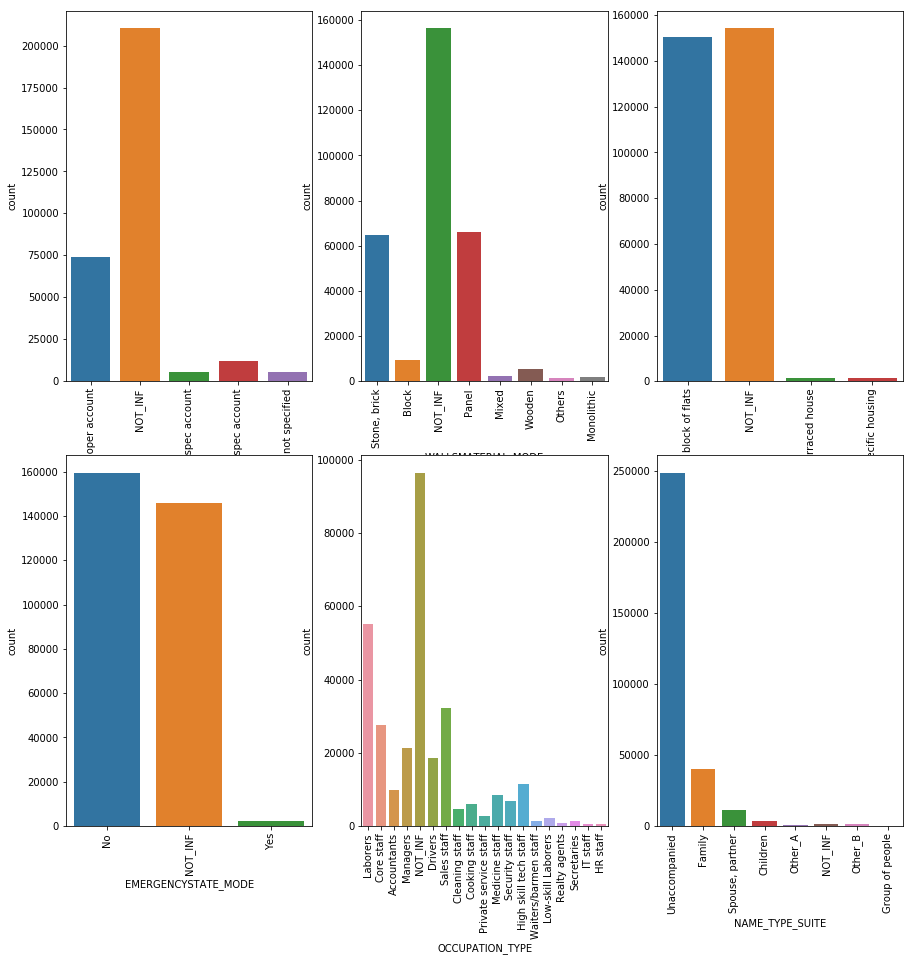

In [62]:
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(15,15))
feat_to_plot = null_non_numerical["column"].values
feat_i = 0

for row in ax:
    for col in row:  
        sns.countplot(x=feat_to_plot[feat_i], data=app_train,ax=col)
        for label in col.get_xticklabels():
            label.set_rotation(90)

        feat_i +=1
        
plt.show()



### binary variables

We can see from the data above that the features EMERGENCYSTATE_MODE has only two possible values (yes/no). However, we're going to treat it as it has more than 2 categories, once we're going to introduce a new category to represent the null values.

The list of binary features is defined below:

In [65]:
binary_features = ['NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY']

non_numerical_features = [col for col in non_numerical_features if col not in binary_features]

Looking at the statistics above we start to see some aspects of the data that would be interesting to adjust:
* Some categorical features have too many levels (e.g: OCCUPATION_TYPE has 18, ORGANIZATION_TYPE has 58)
* Some of them have null data

### Label encoding for categorical features

For features with 2 or more levels, where going to perform one-hot encoding.
For binary features, we're going to perform label encoding.
But before that, null values will be placed in a new category called 'NOT_INF' (short for 'not informed').

In [61]:
for feat in non_numerical_features:
    app_train.at[app_train[feat].isnull(),[feat]] = 'NOT_INF'
    app_test.at[app_test[feat].isnull(),[feat]] = 'NOT_INF'

In [64]:
#binary features
label_encoder = LabelEncoder()
for col in binary_features:
    label_encoder.fit(app_train[col])
    app_train[col] = label_encoder.transform(app_train[col])
    app_test[col] = label_encoder.transform(app_test[col])

NameError: name 'binary_features' is not defined

In [82]:
categorical_data = pd.get_dummies(app_train[non_numerical_features])

In [83]:
categorical_data.head()

,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_NOT_INF,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### data alignment

## Dealing with missing data

TODO : Explains why XGBoost can be a good candidate because it handles missing data.

TODO : How to train a base model (LogisticRegression/RandomForest) with missing data


### Distribution of target data

It seems that data is skewed, we have much more label 0 than label 1

Number of training instances with TARGET 0 : 282686
Number of training instances with TARGET 1 : 24825


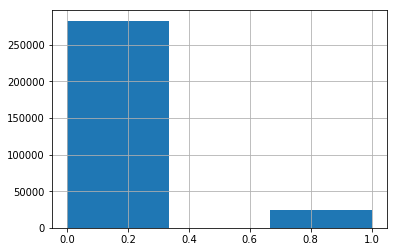

In [16]:
app_train['TARGET'].hist(bins=3)
print('Number of training instances with TARGET 0 : {}'.format(app_train[app_train['TARGET']<=0].shape[0]))
print('Number of training instances with TARGET 1 : {}'.format(app_train[app_train['TARGET']>0].shape[0]))

In [ ]:

## IMPOSSIBLE TO RUN. TAKES TO MUCH TIME
## TODO : Maybe its posssible to run over a sample

pd.scatter_matrix(app_train[features], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [46]:
app_train_corr = app_train[features].corr()

In [47]:
count_high_correlate = 0
corr = pd.DataFrame(columns=['var_a', 'var_b', 'corr'])

for column in app_train_corr.columns:
    for idx,row in app_train_corr.iterrows():
        if (abs(row[column]) > 0.8) and row.name != column:
            if corr[(corr['var_a']==column) & (corr['var_b']==row.name)].shape[0]==0:
                corr = pd.concat([corr,pd.DataFrame({'var_a': [row.name], 'var_b': [column], 'corr': [row[column]]}) ])
                count_high_correlate += 1
                #print ' {} x {} = {}'.format(row.name,column,row[column])
            
print 'Total correlations > 0.8 : {}'.format(count_high_correlate)

/home/braian/anaconda2/envs/ml/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Total correlations > 0.8 : 112


In [58]:
cols = np.unique(corr['var_a'].values + corr['var_b'].values)
cols

array(['AMT_GOODS_PRICEAMT_CREDIT', 'APARTMENTS_MEDIAPARTMENTS_AVG',
       'APARTMENTS_MEDIAPARTMENTS_MODE', 'APARTMENTS_MEDIELEVATORS_AVG',
       'APARTMENTS_MEDIELEVATORS_MODE',
       'APARTMENTS_MEDILIVINGAPARTMENTS_AVG',
       'APARTMENTS_MEDILIVINGAPARTMENTS_MODE',
       'APARTMENTS_MEDILIVINGAREA_AVG', 'APARTMENTS_MEDILIVINGAREA_MODE',
       'APARTMENTS_MODEAPARTMENTS_AVG', 'APARTMENTS_MODEELEVATORS_AVG',
       'APARTMENTS_MODELIVINGAPARTMENTS_AVG',
       'APARTMENTS_MODELIVINGAREA_AVG',
       'BASEMENTAREA_MEDIBASEMENTAREA_AVG',
       'BASEMENTAREA_MEDIBASEMENTAREA_MODE',
       'BASEMENTAREA_MODEBASEMENTAREA_AVG', 'CNT_FAM_MEMBERSCNT_CHILDREN',
       'COMMONAREA_MEDICOMMONAREA_AVG', 'COMMONAREA_MEDICOMMONAREA_MODE',
       'COMMONAREA_MODECOMMONAREA_AVG',
       'DEF_60_CNT_SOCIAL_CIRCLEDEF_30_CNT_SOCIAL_CIRCLE',
       'ELEVATORS_AVGAPARTMENTS_AVG', 'ELEVATORS_MEDIAPARTMENTS_AVG',
       'ELEVATORS_MEDIAPARTMENTS_MEDI', 'ELEVATORS_MEDIAPARTMENTS_MODE',
       'ELEVA

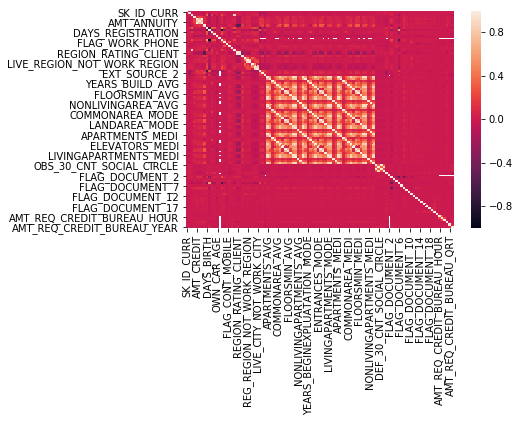

In [10]:
sns.heatmap(app_train_corr,vmin = -1, vmax=1,)

## Additional files

## bureau.csv

In [6]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0000,-153.0000,nan,0,91323.0000,0.0000,nan,0.0000,Consumer credit,-131,nan
1,215354,5714463,Active,currency 1,-208,0,1075.0000,nan,nan,0,225000.0000,171342.0000,nan,0.0000,Credit card,-20,nan
2,215354,5714464,Active,currency 1,-203,0,528.0000,nan,nan,0,464323.5000,nan,nan,0.0000,Consumer credit,-16,nan
3,215354,5714465,Active,currency 1,-203,0,nan,nan,nan,0,90000.0000,nan,nan,0.0000,Credit card,-16,nan
4,215354,5714466,Active,currency 1,-629,0,1197.0000,nan,77674.5000,0,2700000.0000,nan,nan,0.0000,Consumer credit,-21,nan


In [39]:
bureau_cont_feat = [col for col in bureau.columns[2:] if bureau[col].dtype in ['int64','float64']]
bureau_other_feat = [col for col in bureau.columns[2:] if bureau[col].dtype not in ['int64','float64']]
print bureau.columns
print '\nNumerical features : {}\n'.format(bureau_cont_feat)
print 'Categorical features : {}\n'.format(bureau_other_feat)

Index([u'SK_ID_CURR', u'SK_ID_BUREAU', u'CREDIT_ACTIVE', u'CREDIT_CURRENCY',
       u'DAYS_CREDIT', u'CREDIT_DAY_OVERDUE', u'DAYS_CREDIT_ENDDATE',
       u'DAYS_ENDDATE_FACT', u'AMT_CREDIT_MAX_OVERDUE', u'CNT_CREDIT_PROLONG',
       u'AMT_CREDIT_SUM', u'AMT_CREDIT_SUM_DEBT', u'AMT_CREDIT_SUM_LIMIT',
       u'AMT_CREDIT_SUM_OVERDUE', u'CREDIT_TYPE', u'DAYS_CREDIT_UPDATE',
       u'AMT_ANNUITY'],
      dtype='object')

Numerical features : ['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY']

Categorical features : ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']



In [10]:
print 'Total applications from bureau : {}'.format(len(bureau['SK_ID_CURR'].unique()))
print 'Total applications : {}'.format(len(app_train['SK_ID_CURR'].unique()))

Total applications from bureau : 305811
Total applications : 307511


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6303dcfe50>,
      dtype=object)

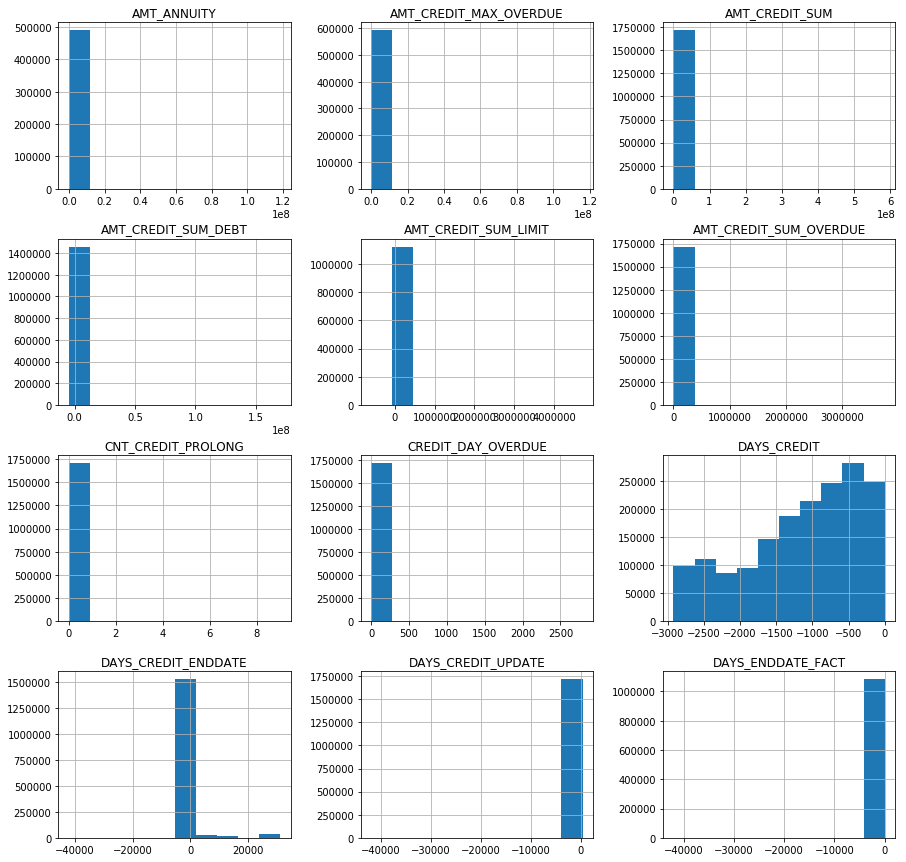

In [30]:
bureau[bureau_cont_feat].hist(figsize=(15,15))

In [36]:
bureau[bureau_other_feat].describe()

,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
count,1716428,1716428,1716428
unique,4,4,15
top,Closed,currency 1,Consumer credit
freq,1079273,1715020,1251615


### bureau_balance.csv

In [41]:
print bureau_balance.shape
bureau_balance.head()

(27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


count   27299925.0000
mean         -30.7417
std           23.8645
min          -96.0000
25%          -46.0000
50%          -25.0000
75%          -11.0000
max            0.0000
Name: MONTHS_BALANCE, dtype: float64

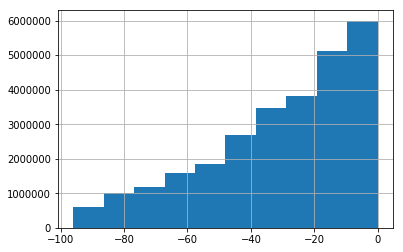

In [8]:
## Month of balance relative to application date (-1 means the freshest balance date)
bureau_balance['MONTHS_BALANCE'].hist()
bureau_balance['MONTHS_BALANCE'].describe()

### Status of Credit Bureau loan during the month :
* active, 
* closed, 
* DPD0-30 :
    * C means closed, 
    * X means status unknown, 
    * 0 means no DPD, 
    * 1 means maximal did during month between 1-30, 
    * 2 means DPD 31-60,
    * 5 means DPD 120+ or sold or written off

In [7]:
print bureau_balance['STATUS'].unique()
bureau_balance['STATUS'].describe()

['C' '0' 'X' '1' '2' '3' '5' '4']


count     27299925
unique           8
top              C
freq      13646993
Name: STATUS, dtype: object

In [11]:
loan_02 = bureau[bureau['SK_ID_CURR']==100002]

In [12]:
loan_02.sort_values(by=['DAYS_CREDIT'])

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
675686,100002,6158906,Closed,currency 1,-1437,0,-1072.0000,-1185.0000,0.0000,0,135000.0000,0.0000,0.0000,0.0000,Consumer credit,-1185,0.0000
675684,100002,6158904,Closed,currency 1,-1125,0,-1038.0000,-1038.0000,nan,0,40761.0000,nan,nan,0.0000,Credit card,-1038,0.0000
675687,100002,6158907,Closed,currency 1,-1121,0,-911.0000,-911.0000,3321.0000,0,19071.0000,nan,nan,0.0000,Consumer credit,-906,0.0000
1486113,100002,6113835,Closed,currency 1,-1043,0,62.0000,-967.0000,0.0000,0,67500.0000,nan,nan,0.0000,Credit card,-758,0.0000
1337779,100002,6158903,Active,currency 1,-1042,0,780.0000,nan,nan,0,450000.0000,245781.0000,0.0000,0.0000,Consumer credit,-7,0.0000
675688,100002,6158908,Closed,currency 1,-645,0,85.0000,-36.0000,5043.6450,0,120735.0000,0.0000,0.0000,0.0000,Consumer credit,-34,0.0000
675685,100002,6158905,Closed,currency 1,-476,0,nan,-48.0000,nan,0,0.0000,0.0000,nan,0.0000,Credit card,-47,nan
675689,100002,6158909,Active,currency 1,-103,0,nan,nan,40.5000,0,31988.5650,0.0000,31988.5650,0.0000,Credit card,-24,0.0000


In [11]:
loan2balance = bureau_balance[bureau_balance['SK_ID_BUREAU']==6158903]

In [12]:
loan2balance

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
19443472,6158903,-19,C
19443473,6158903,-20,C
19443474,6158903,-21,1
19443475,6158903,-22,1
19443476,6158903,-23,0
19443477,6158903,-24,1
19443478,6158903,-25,1
19443479,6158903,-26,X
19443480,6158903,-27,1
19443481,6158903,-28,1


### previous_application.csv

In [18]:
print previous_application.shape
previous_application.head()

(1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.4300,17145.0000,17145.0000,0.0000,17145.0000,SATURDAY,15,...,Connectivity,12.0000,middle,POS mobile with interest,365243.0000,-42.0000,300.0000,-42.0000,-37.0000,0.0000
1,2802425,108129,Cash loans,25188.6150,607500.0000,679671.0000,nan,607500.0000,THURSDAY,11,...,XNA,36.0000,low_action,Cash X-Sell: low,365243.0000,-134.0000,916.0000,365243.0000,365243.0000,1.0000
2,2523466,122040,Cash loans,15060.7350,112500.0000,136444.5000,nan,112500.0000,TUESDAY,11,...,XNA,12.0000,high,Cash X-Sell: high,365243.0000,-271.0000,59.0000,365243.0000,365243.0000,1.0000
3,2819243,176158,Cash loans,47041.3350,450000.0000,470790.0000,nan,450000.0000,MONDAY,7,...,XNA,12.0000,middle,Cash X-Sell: middle,365243.0000,-482.0000,-152.0000,-182.0000,-177.0000,1.0000
4,1784265,202054,Cash loans,31924.3950,337500.0000,404055.0000,nan,337500.0000,THURSDAY,9,...,XNA,24.0000,high,Cash Street: high,nan,nan,nan,nan,nan,nan


In [17]:
pa_cont_feat = [col for col in previous_application.columns[2:] if previous_application[col].dtype in ['int64','float64']]
pa_other_feat = [col for col in previous_application.columns[2:] if previous_application[col].dtype not in ['int64','float64']]
print previous_application.columns
print '\nNumerical features : {}\n'.format(pa_cont_feat)
print 'Categorical features : {}\n'.format(pa_other_feat)

Index([u'SK_ID_PREV', u'SK_ID_CURR', u'NAME_CONTRACT_TYPE', u'AMT_ANNUITY',
       u'AMT_APPLICATION', u'AMT_CREDIT', u'AMT_DOWN_PAYMENT',
       u'AMT_GOODS_PRICE', u'WEEKDAY_APPR_PROCESS_START',
       u'HOUR_APPR_PROCESS_START', u'FLAG_LAST_APPL_PER_CONTRACT',
       u'NFLAG_LAST_APPL_IN_DAY', u'RATE_DOWN_PAYMENT',
       u'RATE_INTEREST_PRIMARY', u'RATE_INTEREST_PRIVILEGED',
       u'NAME_CASH_LOAN_PURPOSE', u'NAME_CONTRACT_STATUS', u'DAYS_DECISION',
       u'NAME_PAYMENT_TYPE', u'CODE_REJECT_REASON', u'NAME_TYPE_SUITE',
       u'NAME_CLIENT_TYPE', u'NAME_GOODS_CATEGORY', u'NAME_PORTFOLIO',
       u'NAME_PRODUCT_TYPE', u'CHANNEL_TYPE', u'SELLERPLACE_AREA',
       u'NAME_SELLER_INDUSTRY', u'CNT_PAYMENT', u'NAME_YIELD_GROUP',
       u'PRODUCT_COMBINATION', u'DAYS_FIRST_DRAWING', u'DAYS_FIRST_DUE',
       u'DAYS_LAST_DUE_1ST_VERSION', u'DAYS_LAST_DUE', u'DAYS_TERMINATION',
       u'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

Numerical features : ['AMT_ANNUITY', 'AMT_APPLICATIO

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc6a577450>,
      dtype=object)

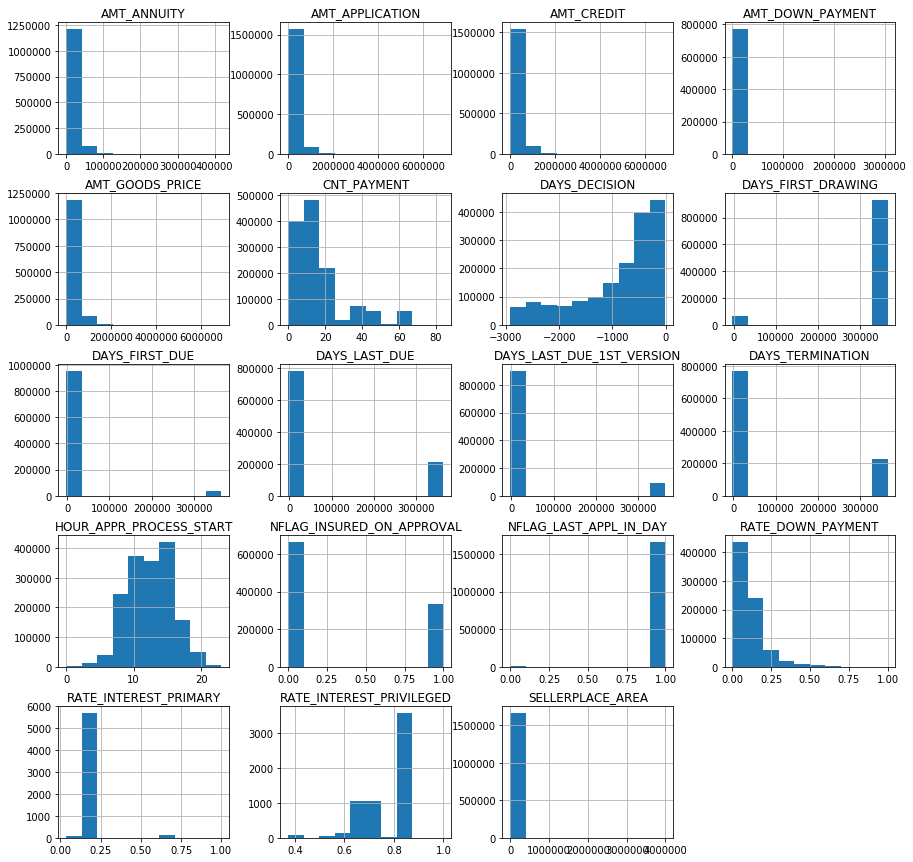

In [23]:
previous_application[pa_cont_feat].hist(figsize=(15,15))

In [24]:
previous_application[pa_cont_feat].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1297979.0000,1670214.0000,1670213.0000,774370.0000,1284699.0000,1670214.0000,1670214.0000,774370.0000,5951.0000,5951.0000,1670214.0000,1670214.0000,1297984.0000,997149.0000,997149.0000,997149.0000,997149.0000,997149.0000,997149.0000
mean,15955.1207,175233.8604,196114.0212,6697.4021,227847.2793,12.4842,0.9965,0.0796,0.1884,0.7735,-880.6797,313.9511,16.0541,342209.8550,13826.2693,33767.7741,76582.4031,81992.3438,0.3326
std,14782.1373,292779.7624,318574.6165,20921.4954,315396.5579,3.3340,0.0593,0.1078,0.0877,0.1009,779.0997,7127.4435,14.5673,88916.1158,72444.8697,106857.0348,149647.4151,153303.5167,0.4711
min,0.0000,0.0000,0.0000,-0.9000,0.0000,0.0000,0.0000,-0.0000,0.0348,0.3732,-2922.0000,-1.0000,0.0000,-2922.0000,-2892.0000,-2801.0000,-2889.0000,-2874.0000,0.0000
25%,6321.7800,18720.0000,24160.5000,0.0000,50841.0000,10.0000,1.0000,0.0000,0.1607,0.7156,-1300.0000,-1.0000,6.0000,365243.0000,-1628.0000,-1242.0000,-1314.0000,-1270.0000,0.0000
50%,11250.0000,71046.0000,80541.0000,1638.0000,112320.0000,12.0000,1.0000,0.0516,0.1891,0.8351,-581.0000,3.0000,12.0000,365243.0000,-831.0000,-361.0000,-537.0000,-499.0000,0.0000
75%,20658.4200,180360.0000,216418.5000,7740.0000,234000.0000,15.0000,1.0000,0.1089,0.1933,0.8525,-280.0000,82.0000,24.0000,365243.0000,-411.0000,129.0000,-74.0000,-44.0000,1.0000
max,418058.1450,6905160.0000,6905160.0000,3060045.0000,6905160.0000,23.0000,1.0000,1.0000,1.0000,1.0000,-1.0000,4000000.0000,84.0000,365243.0000,365243.0000,365243.0000,365243.0000,365243.0000,1.0000


In [25]:
previous_application[pa_other_feat].describe()

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
count,1670214,1670214,1670214,1670214,1670214,1670214,1670214,849809,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1669868
unique,4,7,2,25,4,4,9,7,4,28,5,3,8,11,5,17
top,Cash loans,TUESDAY,Y,XAP,Approved,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,POS,XNA,Credit and cash offices,XNA,XNA,Cash
freq,747553,255118,1661739,922661,1036781,1033552,1353093,508970,1231261,950809,691011,1063666,719968,855720,517215,285990


### Instalment_payments.csv

In [28]:
print installments_payments.shape
installments_payments.head()

(13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0000,6,-1180.0000,-1187.0000,6948.3600,6948.3600
1,1330831,151639,0.0000,34,-2156.0000,-2156.0000,1716.5250,1716.5250
2,2085231,193053,2.0000,1,-63.0000,-63.0000,25425.0000,25425.0000
3,2452527,199697,1.0000,3,-2418.0000,-2426.0000,24350.1300,24350.1300
4,2714724,167756,1.0000,2,-1383.0000,-1366.0000,2165.0400,2160.5850


In [29]:
installments_payments[installments_payments.columns[2:]].describe()

,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,13605401.0000,13605401.0000,13605401.0000,13602496.0000,13605401.0000,13602496.0000
mean,0.8566,18.8709,-1042.2700,-1051.1137,17050.9070,17238.2232
std,1.0352,26.6641,800.9463,800.5859,50570.2544,54735.7840
min,0.0000,1.0000,-2922.0000,-4921.0000,0.0000,0.0000
25%,0.0000,4.0000,-1654.0000,-1662.0000,4226.0850,3398.2650
50%,1.0000,8.0000,-818.0000,-827.0000,8884.0800,8125.5150
75%,1.0000,19.0000,-361.0000,-370.0000,16710.2100,16108.4250
max,178.0000,277.0000,-1.0000,-1.0000,3771487.8450,3771487.8450


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc68618590>,
      dtype=object)

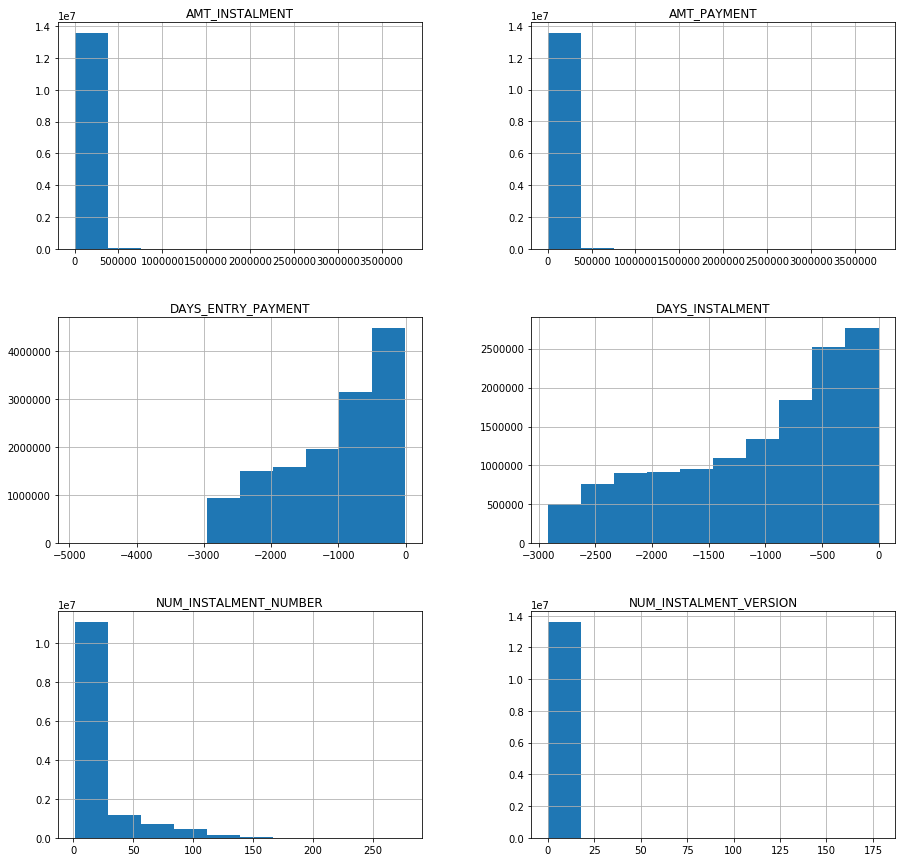

In [31]:
installments_payments[installments_payments.columns[2:]].hist(figsize=(15,15))

### credit_card_balance.csv

In [33]:
print credit_card_balance.shape
credit_card_balance.head()

(3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.9700,135000,0.0000,877.5000,0.0000,877.5000,1700.3250,...,0.0000,0.0000,0.0000,1,0.0000,1.0000,35.0000,Active,0,0
1,2582071,363914,-1,63975.5550,45000,2250.0000,2250.0000,0.0000,0.0000,2250.0000,...,64875.5550,64875.5550,1.0000,1,0.0000,0.0000,69.0000,Active,0,0
2,1740877,371185,-7,31815.2250,450000,0.0000,0.0000,0.0000,0.0000,2250.0000,...,31460.0850,31460.0850,0.0000,0,0.0000,0.0000,30.0000,Active,0,0
3,1389973,337855,-4,236572.1100,225000,2250.0000,2250.0000,0.0000,0.0000,11795.7600,...,233048.9700,233048.9700,1.0000,1,0.0000,0.0000,10.0000,Active,0,0
4,1891521,126868,-1,453919.4550,450000,0.0000,11547.0000,0.0000,11547.0000,22924.8900,...,453919.4550,453919.4550,0.0000,1,0.0000,1.0000,101.0000,Active,0,0


In [34]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
SK_ID_PREV                    int64
SK_ID_CURR                    int64
MONTHS_BALANCE                int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL       int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT          int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS          object
SK_DPD                        int64
SK_DPD_DEF                    int64
dtypes: float64(15), int64(7

In [36]:
credit_card_balance[credit_card_balance.columns[2:20]].describe()

,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM
count,3840312.0000,3840312.0000,3840312.0000,3090496.0000,3840312.0000,3090496.0000,3090496.0000,3535076.0000,3072324.0000,3840312.0000,3840312.0000,3840312.0000,3840312.0000,3090496.0000,3840312.0000,3090496.0000,3090496.0000,3535076.0000
mean,-34.5219,58300.1553,153807.9574,5961.3248,7433.3882,288.1696,2968.8048,3540.2041,10280.5377,7588.8567,55965.8769,58088.8112,58098.2855,0.3094,0.7031,0.0048,0.5595,20.8251
std,26.6678,106307.0310,165145.6995,28225.6886,33846.0773,8201.9893,20796.8870,5600.1541,36078.0850,32005.9878,102533.6168,105965.3699,105971.8011,1.1004,3.1903,0.0826,3.2406,20.0515
min,-96.0000,-420250.1850,0.0000,-6827.3100,-6211.6200,0.0000,0.0000,0.0000,0.0000,0.0000,-423305.8200,-420250.1850,-420250.1850,0.0000,0.0000,0.0000,0.0000,0.0000
25%,-55.0000,0.0000,45000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,152.3700,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000
50%,-28.0000,0.0000,112500.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2702.7000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,15.0000
75%,-11.0000,89046.6862,180000.0000,0.0000,0.0000,0.0000,0.0000,6633.9112,9000.0000,6750.0000,85359.2400,88899.4912,88914.5100,0.0000,0.0000,0.0000,0.0000,32.0000
max,-1.0000,1505902.1850,1350000.0000,2115000.0000,2287098.3150,1529847.0000,2239274.1600,202882.0050,4289207.4450,4278315.6900,1472316.7950,1493338.1850,1493338.1850,51.0000,165.0000,12.0000,165.0000,120.0000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc682afe90>,
      dtype=object)

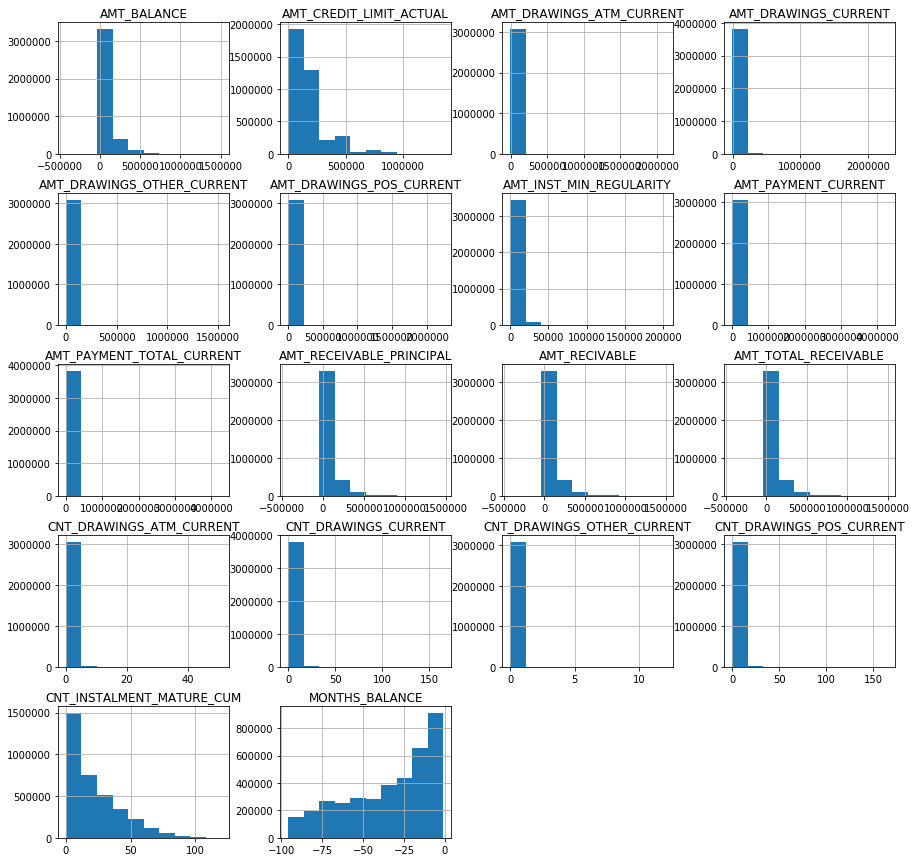

In [38]:
credit_card_balance[credit_card_balance.columns[2:20]].hist(figsize=(15,15) )

In [41]:
print credit_card_balance['NAME_CONTRACT_STATUS'].unique()
credit_card_balance['NAME_CONTRACT_STATUS'].describe()

['Active' 'Completed' 'Demand' 'Signed' 'Sent proposal' 'Refused'
 'Approved']


count     3840312
unique          7
top        Active
freq      3698436
Name: NAME_CONTRACT_STATUS, dtype: object

### POS_CASH_balance.csv

In [43]:
print POS_CASH_balance.shape
POS_CASH_balance.head()

(10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0000,45.0000,Active,0,0
1,1715348,367990,-33,36.0000,35.0000,Active,0,0
2,1784872,397406,-32,12.0000,9.0000,Active,0,0
3,1903291,269225,-35,48.0000,42.0000,Active,0,0
4,2341044,334279,-35,36.0000,35.0000,Active,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc5e928ad0>,
      dtype=object)

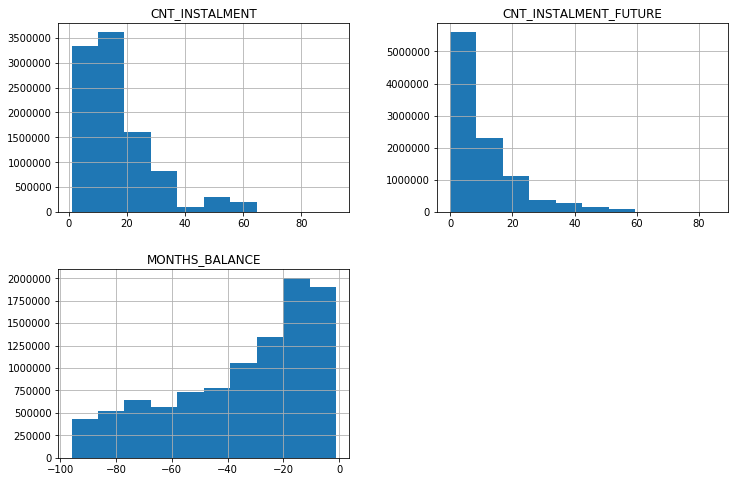

In [47]:
POS_CASH_balance[POS_CASH_balance.columns[2:5]].hist(figsize=(12,8))

In [49]:
print POS_CASH_balance['NAME_CONTRACT_STATUS'].unique()
POS_CASH_balance['NAME_CONTRACT_STATUS'].describe()

['Active' 'Completed' 'Signed' 'Approved' 'Returned to the store' 'Demand'
 'Canceled' 'XNA' 'Amortized debt']


count     10001358
unique           9
top         Active
freq       9151119
Name: NAME_CONTRACT_STATUS, dtype: object